# Analysis on TLD for fingerprining Scripts(Audio, Canvas, Font, WebRTC)

### What does Top-Level Domain (TLD) mean?

Top-level domain (TLD) refers to the last segment of a domain name, or the part that follows immediately after the "dot" symbol. Examples of some of the popular TLDs include .com, .org, .net, .gov, .biz and .edu. 

A top-level domain recognizes a certain element regarding the associated website, such as its objective (business, government, education), its owner, or the geographical area from which it originated.

Each TLD includes an independent registry controlled by a specific organization, which is managed under the guidance of the Internet Corporation for Assigned Names and Numbers (ICANN).

ICANN recognizes the following types of TLDs:

- Generic Top-Level Domains (gTLD): These are the most popular types of TDLs. Some examples include ".edu" for educational sites and ."com" for commercial sites. These types of TLDs are available for registration.

- Country-Code Top-Level Domains (ccTLD): Every ccTLD recognizes a specific country and is generally two letters long. For example, the ccTLD for Australia is ".au".

- Sponsored Top-Level Domains (sTLD): These TLDs are supervised by private organizations.

- Infrastructure Top-Level Domains: There is only one TLD in this category, which is ".arpa". The Internet Assigned Numbers Authority controls this TLD for the Internet Engineering Task Force (IETF).

## TLD and Web Searches
Being found on the web is a necessity for any business, a recent study by Searchmetrics found only 11% of the web is actually visible. They analyzed over 100,000 domain names, and 75% go back to .com, which are by far the most visible TLD in a keyword search.
    
Over 1.17 Billion people use search, so optimizing your domain for Google's search engine is crucial if you want to be found. Google rewards companies that build brands, and brands are usually built on .coms. With only 11% of the web visible, small businesses with a proper brand strategy are the ones that pull ahead of the pack.

One of the primary reasons behind the advantageous visibility of the .com TLD in relation to others is the fact that it's been the default domain since 1985. 

## What is the distribution of TLD for script_url, location in the 10% dataset and Fingerprinting Scripts?
This notebook extracts the TLDs for script_url and location in the 10% dataset and Audio, Canvas, Font and WebRTC Fingerprinting scripts. It then calculates the frequency of the TLDs for both script_url and location for the dataset and fingerprinting scripts and plots a graph for better visiualization. The deductions from the computations are mentioned below.


In [1]:
import pandas as pd
import dask.dataframe as dd
from dask.distributed import Client
import json
from collections import Counter
Client()

/home/soumya/.conda/envs/overscripted/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/home/soumya/.conda/envs/overscripted/lib/python3.6/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


Client Scheduler: tcp://127.0.0.1:43585 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 12 Memory: 8.25 GB


In [3]:

df = pd.read_parquet(
     '/home/soumya/Dataset/sample_0.parquet', engine='pyarrow',
    columns=['script_url','location']
)
# Finding the unique scripts
script_url_unique=df.script_url.unique()
script_url_unique[0:10]

array(['https://vk.com/js/api/xdm.js?1449919642',
       'https://vk.com/js/al/aes_light.js?592436914',
       'https://cpro.baidustatic.com/cpro/ui/noexpire/js/4.0.0/adClosefeedbackUpgrade.min.js',
       'https://apis.google.com/js/plusone.js?_=1513387467959',
       'https://apis.google.com/_/scs/apps-static/_/js/k=oz.gapi.en_US.u6kjN8qjK4c.O/m=plusone/rt=j/sv=1/d=1/ed=1/am=AQ/rs=AGLTcCNyWKI1jWTPxsTegkpGnwIGUlr0VQ/cb=gapi.loaded_0',
       'https://assets.adobedtm.com/caacec67651710193d2331efef325107c23a0145/satelliteLib-78cf42deb149c9766cbaaa6151e252b9b67c0200.js',
       'https://assets.adobedtm.com/caacec67651710193d2331efef325107c23a0145/s-code-contents-69cce4f42ae039e7c3974e2fa4292c5e7ad592ab.js',
       'https://www.google-analytics.com/analytics.js',
       'https://www.google-analytics.com/plugins/ua/linkid.js',
       'https://www.canada.ca/etc/designs/canada/wet-boew/js/wet-boew.min.js'],
      dtype=object)

In [4]:
 len(script_url_unique)

166862

In [5]:
# Finding the unique locations
location_unique=df.location.unique()
location_unique[0:10]

array(['https://vk.com/widget_comments.php?app=2297596&width=100%25&_ver=1&limit=10&height=0&mini=auto&norealtime=0&page=0&status_publish=0&attach=*&url=https%3A%2F%2Fwww.gl5.ru%2Flena-katina-silent-hills.html&title=Lena%20Katina%20-%20Silent%20Hills%20%D1%82%D0%B5%D0%BA%D1%81%D1%82%20%D0%BF%D0%B5%D1%81%D0%BD%D0%B8(%D1%81%D0%BB%D0%BE%D0%B2%D0%B0)&description=Lena%20Katina%20-%20Silent%20Hills%20%D1%82%D0%B5%D0%BA%D1%81%D1%82%20%D0%BF%D0%B5%D1%81%D0%BD%D0%B8(%D1%81%D0%BB%D0%BE%D0%B2%D0%B0)&image=&startWidth=600&referrer=&16060b4b60d',
       'https://pos.baidu.com/s?hei=70&wid=670&di=u3130587&ltu=https%3A%2F%2Fielts.liuxue86.com%2Fi%2F3040174.html&dis=0&pss=1353x4446&dri=0&ccd=24&ant=0&pis=-1x-1&cce=true&ti=%E5%88%A9%E7%94%A8%E7%B2%BE%E8%AF%BB%E5%88%86%E6%9E%90%E9%9B%85%E6%80%9D%E9%98%85%E8%AF%BB%E6%AE%B5%E8%90%BD&tpr=1513383844066&exps=111000&cfv=0&par=1366x768&dtm=HTML_POST&psr=1366x768&ps=3274x176&ari=2&cja=false&chi=1&prot=2&dai=8&tcn=1513383844&cec=UTF-8&drs=3&cpl=1&dc=2&cdo=-1&tlm

In [6]:
len(location_unique)

205949

In [7]:
# Finding the netloc of unique scripts 
from urllib.parse import urlparse

EMPTY_STRING = 'EMPTY_STRING'

def get_netloc(x):
    p = urlparse(x)
    val = p.netloc
    if len(val) == 0:
        val = EMPTY_STRING
    return val

script_netloc_unique= df.script_url.apply(get_netloc).unique()
#script_netloc_uniquedf=pd.DataFrame(script_netloc_unique)
script_netloc_unique[0:10]

array(['vk.com', 'cpro.baidustatic.com', 'apis.google.com',
       'assets.adobedtm.com', 'www.google-analytics.com', 'www.canada.ca',
       's0.2mdn.net', 'g.alicdn.com', 'maniform.world.tmall.com',
       'uaction.alicdn.com'], dtype=object)

In [8]:
len(script_netloc_unique)

20163

In [9]:
# Finding the netloc of unique locations
location_netloc_unique= df.location.apply(get_netloc).unique()
#location_netloc_uniquedf = pd.DataFrame(location_netloc_unique)
location_netloc_unique[0:10]

array(['vk.com', 'pos.baidu.com', 'serienjunkies.org', 'www.canada.ca',
       's0.2mdn.net', 'maniform.world.tmall.com',
       'www.baseball-reference.com', 'platform.twitter.com',
       'www.coches.net', 'www.facebook.com'], dtype=object)

In [10]:
len(location_netloc_unique)

20392

In [11]:

dff = dd.read_parquet(
     '/home/soumya/Dataset/sample_0.parquet', engine='pyarrow',
    columns=['script_url','location']
)
def get_netloc(x):
    p = urlparse(x)
    val = p.netloc
    if len(val) == 0:
        val = EMPTY_STRING
    return val
def get_end_of_net_loc(x):
    splits = x.split('.')
    val = splits[-1]
    return val
#Extract TLD for each script_url
dff['script_netloc'] = dff.script_url.apply(get_netloc)
dff['script_netloc_extracttld']=dff.script_netloc.apply(get_end_of_net_loc, meta= 'O')

#Extract TLD for each location
dff['location_netloc'] = dff.location.apply(get_netloc, meta='O')
dff['location_netloc_extracttld']=dff.location_netloc.apply(get_end_of_net_loc, meta= 'O')
dff.head()



/home/soumya/.conda/envs/overscripted/lib/python3.6/site-packages/dask/dataframe/core.py:2285: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  warnings.warn(msg)


,script_url,location,script_netloc,script_netloc_extracttld,location_netloc,location_netloc_extracttld
call_id,,,,,,
1_00006011493ed94fb8010cead84ee610cdbece5de961abe96f0cba54.json__0,https://vk.com/js/api/xdm.js?1449919642,https://vk.com/widget_comments.php?app=2297596...,vk.com,com,vk.com,com
1_00006011493ed94fb8010cead84ee610cdbece5de961abe96f0cba54.json__1,https://vk.com/js/api/xdm.js?1449919642,https://vk.com/widget_comments.php?app=2297596...,vk.com,com,vk.com,com
1_00006011493ed94fb8010cead84ee610cdbece5de961abe96f0cba54.json__2,https://vk.com/js/al/aes_light.js?592436914,https://vk.com/widget_comments.php?app=2297596...,vk.com,com,vk.com,com
1_00006b1ad6ce7a5b2b81a8ef96f0778853ea6d81a97693d85a52790c.json__0,https://cpro.baidustatic.com/cpro/ui/noexpire/...,https://pos.baidu.com/s?hei=70&wid=670&di=u313...,cpro.baidustatic.com,com,pos.baidu.com,com
1_0000813d43acf1fe219ada01597cfb1d5dc9c12b61f343c6cfac362b.json__0,https://apis.google.com/js/plusone.js?_=151338...,http://serienjunkies.org/smilf/smilf-season-1-...,apis.google.com,com,serienjunkies.org,org


In [14]:
# Count of unique TLD in script_url
count=dff.script_netloc_extracttld.nunique().compute()
count

281

In [15]:
# Count of unique TLD in location
count=dff.location_netloc_extracttld.nunique().compute()
count

252

## Frequency of each TLD in the dataset for script_url

In [16]:
Frequency_script_url=dff.groupby('script_netloc_extracttld').size().compute().sort_values(ascending=False)
Frequency_script_url[0:10]

script_netloc_extracttld
com    7336833
net    1898419
ru      630262
cn      154068
de      153067
fr       85601
jp       70494
ch       59317
au       46514
org      45280
dtype: int64

## Frequency of each TLD in the dataset for location

In [17]:
## Frequency of each TLD in the dataset for script_url
Frequency_location=dff.groupby('location_netloc_extracttld').size().compute().sort_values(ascending=False)
Frequency_location[0:10]

location_netloc_extracttld
com    6370062
net     753381
ru      734510
de      341844
cn      203269
fr      186050
uk      171826
jp      160152
au      130255
org     125585
dtype: int64

## Top 10 TLD in the Data for script_url

In [18]:
temp=[]
temp_url=[]
for i in range(0,10):
    temp.append(Frequency_script_url[i])
    temp_url.append(Frequency_script_url.index[i])
print(temp_url)

['com', 'net', 'ru', 'cn', 'de', 'fr', 'jp', 'ch', 'au', 'org']


In [19]:
dfplot = pd.DataFrame({'domain':temp_url, 'val':temp})
ax = dfplot.plot.bar(x='domain', y='val', rot=0) 

This shows the dataset consists of a maximum of .com(commercial) TLD followed by .net(network) for the called scripts.
It also shows the distribution of scripts accross different countries with the help of country specific TLDs. It shows .ru is at the top followed by .cn.

## Top 10 TLD in the Data for location

In [21]:
temp_loc=[]
temp_url_loc=[]
for i in range(0,10):
    temp_loc.append(Frequency_location[i])
    temp_url_loc.append(Frequency_location.index[i])
print(temp_url_loc)

['com', 'net', 'ru', 'de', 'cn', 'fr', 'uk', 'jp', 'au', 'org']


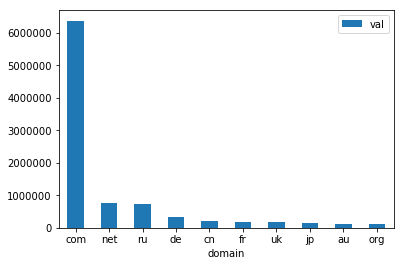

In [22]:
dfplot = pd.DataFrame({'domain':temp_url_loc, 'val':temp_loc})
ax = dfplot.plot.bar(x='domain', y='val', rot=0) 

The location TLDS in the dataset consists of a maximum of .com(commercial) TLD followed by .net(network).The distribution of location scripts accross different countries wich can be seen with the help of country specific TLDs shows .ru is at the top followed by .de.

We can observe, in the 10% dataset out of the total 11,292,867 locations 6,370,062 locations constitute the .com TLDs which percents to 56.4%.  

The called scripts(scrits_url) consists of 7,336,833.com urls which is fact greater than the number of TLDS for location


## Audio Fingerprinting

An audio fingerprint (also referred to as an acoustic fingerprint) is a compact representation of some audio that encapsulates information that is specific to the audio that it represents. The role of an audio fingerprint is to capture the signature of a piece of sound, such as a song, that allows it to be differentiated from other sounds.

## TLD in the Audio Fingerprinting Scripts
[Refer]() for the code to extract TLD.

In [23]:
with open('audio_script_url.json', 'r') as f:
    audio_script_url_plot = json.load(f)

# Arange in descending order    
c=Counter(audio_script_url_plot)
audio_script_url_plot=dict(c.most_common())
audio_script_url_plot

{'com': 31, 'net': 14, 'org': 2, 'vn': 2, 'pub': 1, 'st': 1, 'io': 1}

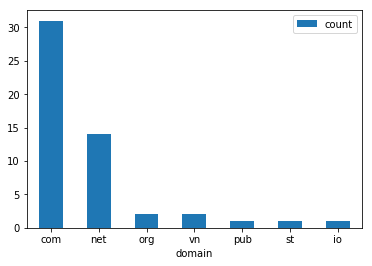

In [24]:
#Convert to list for plotting
domain=list(audio_script_url_plot.keys())
count=list(audio_script_url_plot.values())

dfplot = pd.DataFrame({'domain':domain, 'count':count})
ax = dfplot.plot.bar(x='domain', y='count', rot=0)

For font fingerprinting scripts out of 54 scripts 31 are of.com which percents to 54.40% followed by .net ie. 14/54 and percents to 25.92. 

## For location

In [25]:
with open('audio_location.json', 'r') as f:
    audio_location_plot = json.load(f)

# Arrange in descending order    
c=Counter(audio_location_plot)
audio_location_plot=dict(c.most_common())
audio_location_plot



{'com': 125,
 'net': 17,
 'vn': 16,
 'org': 15,
 'com.vn': 4,
 'ru': 2,
 'co.uk': 2,
 'es': 1,
 'com.hk': 1,
 'tv': 1}

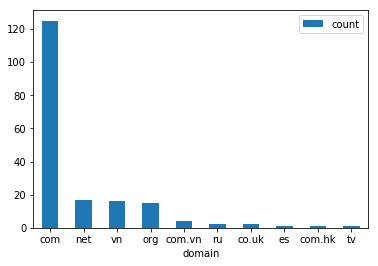

In [26]:
#Convert to list for plotting
domain=list(audio_location_plot.keys())
count=list(audio_location_plot.values())

dfplot = pd.DataFrame({'domain':domain, 'count':count})
ax = dfplot.plot.bar(x='domain', y='count', rot=0)


For font fingerprinting scripts out of 184 locations 125 are of.com which percents to 67.93%.

## Canvas Fingerprinting

Canvas fingerprinting is one of a number of browser fingerprinting techniques for tracking online users that allow websites to identify and track visitors using the HTML5 canvas element instead of browser cookies or other similar means. 
As described by Acar et. al. in [The Web never forgets: Persistent tracking mechanisms in the wild](https://securehomes.esat.kuleuven.be/~gacar/persistent/index.html)
Fingerprinting script first draws text with the font and size of its choice and adds background colors (1). Next, the script calls Canvas API’s ToDataURL method to get the canvas pixel data in dataURL format (2), which is basically a Base64 encoded representation of the binary pixel data. Finally, the script takes the hash of the text-encoded pixel data (3), which serves as the fingerprint 

## TLD in the Canvas Fingerprinting Scripts 
[Refer]() for the code to extract TLD.

## For script_url

In [45]:
with open('canvas_script_url.json', 'r') as f:
    canvas_script_url_plot = json.load(f)

# Arrange in descending order    
c=Counter(canvas_script_url_plot)
canvas_script_url_plot=dict(c.most_common())
canvas_script_url_plot


{'com': 851,
 'network': 118,
 'net': 96,
 'es': 83,
 'cn': 52,
 'de': 44,
 'ca': 36,
 'co.uk': 35,
 'it': 23,
 'co.jp': 15,
 'pl': 12,
 'com.tw': 10,
 'fr': 10,
 'ru': 8,
 'io': 8,
 'ws': 6,
 'com.br': 6,
 'ch': 6,
 'org': 5,
 'in': 4,
 'sexy': 4,
 '': 3,
 'hk': 3,
 'nl': 3,
 'cz': 3,
 'tv': 2,
 'az': 2,
 'vn': 2,
 'vc': 2,
 'cc': 2,
 'ly': 2,
 're': 2,
 'co.il': 1,
 'sk': 1,
 'net.cn': 1,
 'jp': 1,
 'dhl': 1,
 'gs': 1,
 'systems': 1,
 'biz': 1,
 'com.au': 1,
 'pub': 1,
 'jo': 1,
 'ai': 1,
 'st': 1,
 'pro': 1,
 'org.br': 1}

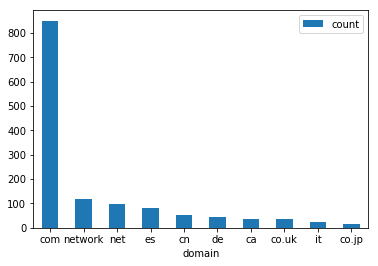

In [28]:
#Convert to list for plotting
domain=list(canvas_script_url_plot.keys())
count=list(canvas_script_url_plot.values())

dfplot = pd.DataFrame({'domain':domain[0:10], 'count':count[0:10]})
ax = dfplot.plot.bar(x='domain', y='count', rot=0)

In canvas fingerprinting scripts out of 1473 script_url 851 are of .com com which is  57.77%.

## For location

In [47]:
with open('canvas_location.json', 'r') as f:
    canvas_location_plot = json.load(f)

# Arrange in descending order    
c=Counter(canvas_location_plot)
canvas_location_plot=dict(c.most_common())
canvas_location_plot


{'com': 2235,
 'net': 182,
 'es': 137,
 'network': 112,
 'de': 93,
 'fr': 74,
 'it': 74,
 'co.uk': 74,
 'cn': 69,
 'ru': 68,
 'ca': 57,
 'org': 40,
 'com.tw': 31,
 'tv': 28,
 'co': 26,
 'gov': 24,
 'pl': 21,
 'cz': 20,
 'jp': 20,
 'ws': 20,
 'cc': 18,
 'sc': 18,
 'co.jp': 18,
 'vn': 17,
 'com.br': 16,
 'in': 15,
 'ch': 11,
 'com.cn': 10,
 'edu': 10,
 'lol': 9,
 'io': 8,
 'ac.uk': 7,
 'com.hk': 5,
 'biz': 5,
 'sexy': 4,
 'com.vn': 4,
 'hk': 4,
 'co.il': 4,
 'az': 4,
 'to': 3,
 'ie': 3,
 'sk': 3,
 'zone': 3,
 'com.au': 3,
 'nl': 3,
 'watch': 3,
 'at': 2,
 'ec': 2,
 'club': 2,
 'bz': 2,
 'com.tr': 2,
 'vc': 2,
 'dhl': 1,
 'pw': 1,
 'co.za': 1,
 'co.kr': 1,
 'no': 1,
 'eu': 1,
 'gp': 1,
 'jo': 1,
 'com.uy': 1,
 'co.th': 1}

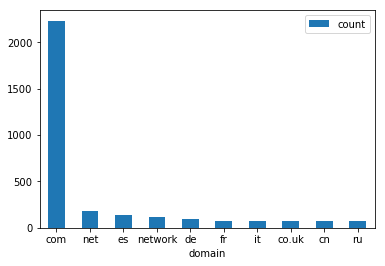

In [30]:
#Convert to list for plotting
domain=list(canvas_location_plot.keys())
count=list(canvas_location_plot.values())

dfplot = pd.DataFrame({'domain':domain[0:10], 'count':count[0:10]})
ax = dfplot.plot.bar(x='domain', y='count', rot=0)

In canvas fingerprinting scripts out of 3635 locations 2235 are of .com com which is 61.48%.

## Font Fingerprinting 

Font fingerprinting – is what fonts you have, and how they are drawn. Based on measuring dimensions of the filled with text HTML elements, it is possible to build an identifier that can be used to track the same browser over time.

The font is a file used by programs on your device when they want to display a text with a certain shape for the characters. For example, in Windows, the font files are located in the C:WindowsFonts folder.
Your device has a list of fonts that can be used. Standard fonts are those fonts that came with your operating system. But most of the software you installed on your device brings with them other fonts during software installation. The chances of you having the same programs installed on your device as another individual are very small (it’s just like the lottery), so you will have a list of fonts installed that is almost certainly unique.
Because any website you visit can see almost all your list of fonts, this site can recognize you the next time you access it.


Font metric-based fingerprinting is tightly crossed with the canvas fingerprinting. It is probably weaker fingerprinting technique, since canvas gets not only bounding boxes but also pixel data. On the other hand font fingerprinting is much more difficult to defend.



## TLD in the Font Fingerprinting Scripts

[Refer]() for the code to extract TLD.

## For script_url

In [31]:
with open('font_script_url.json', 'r') as f:
    font_script_url_plot = json.load(f)
    
# Arrange in descending order    
c=Counter(font_script_url_plot)
font_script_url_plot=dict(c.most_common())
font_script_url_plot


{'network': 110, 'com': 49, 'net': 4, 'vn': 2}

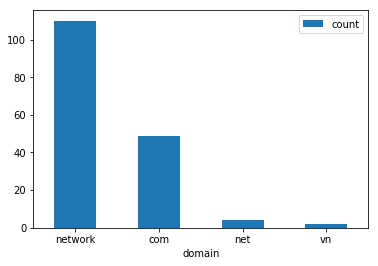

In [33]:
#Convert to list for plotting
domain=list(font_script_url_plot.keys())
count=list(font_script_url_plot.values())

dfplot = pd.DataFrame({'domain':domain, 'count':count})
ax = dfplot.plot.bar(x='domain', y='count', rot=0)


In font fingerprinting scripts out of 165 script_url 110 are of .network which is 66.66% and it is followed by .com  constituting 49/165 ie. 29.69%.

## For location

In [34]:
with open('font_location.json', 'r') as f:
    font_location_plot = json.load(f)

# Arrange in descending order    
c=Counter(font_location_plot)
font_location_plot=dict(c.most_common())
font_location_plot



{'network': 110,
 'com': 73,
 'vn': 16,
 'net': 16,
 'com.vn': 4,
 'com.tr': 2,
 'in': 2,
 'gr': 1,
 'eu': 1,
 'com.ar': 1,
 'fi': 1,
 'es': 1,
 'com.uy': 1}

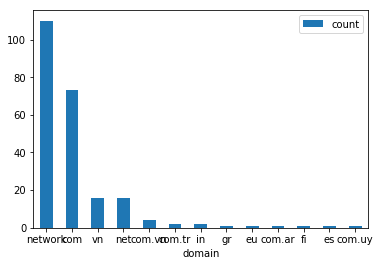

In [35]:
#Convert to list for plotting
domain=list(font_location_plot.keys())
count=list(font_location_plot.values())

dfplot = pd.DataFrame({'domain':domain, 'count':count})
ax = dfplot.plot.bar(x='domain', y='count', rot=0)


In font fingerprinting scripts out of 229 locations_url 110 are of .network which is 48.03% and it is followed by .com  constituting 73/229 ie. 31.87%.
Unlike others Font fingerprinting shows the .network TLD scripts are the highest contributors followed by .com.

## WebRTC Fingerprinting

[WebRTC](http://randomwalker.info/publications/OpenWPM_1_million_site_tracking_measurement.pdf) is a framework for peer-to-peer Real Time Communication in the browser, and acces-sible via Javascript. To discover the best network path between peers, each peer collects all available candidate addresses, including addresses from the local network interfaces (such as ethernet or WiFi) and addresses from the public side of the NAT and makes them available to the web application without explicit permission from the user.




## TLD in the WebRTC Fingerprinting Scripts
[Refer]() for the code to extract TLD.

## For script_url

In [36]:
with open('WebRTC_script_url.json', 'r') as f:
    WebRTC_script_url_plot = json.load(f)

# Arrange in descending order    
c=Counter(WebRTC_script_url_plot)
WebRTC_script_url_plot=dict(c.most_common())
WebRTC_script_url_plot


{'com': 143,
 'cn': 42,
 'ua': 22,
 'net': 11,
 'photos': 4,
 'vn': 2,
 're': 2,
 'com.br': 1,
 '': 1,
 'io': 1,
 'es': 1}

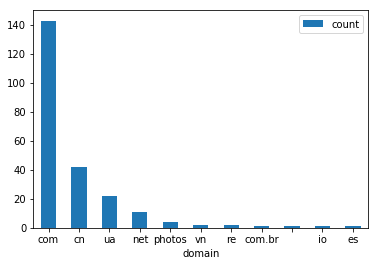

In [37]:
#Convert to list for plotting
domain=list(WebRTC_script_url_plot.keys())
count=list(WebRTC_script_url_plot.values())

dfplot = pd.DataFrame({'domain':domain, 'count':count})
ax = dfplot.plot.bar(x='domain', y='count', rot=0)

It can be seen that highest contributor is .com ie 143/230 and percents to 62.17% to followed by .cn .ua and .net is followed by them.


## For location

In [48]:
with open('WebRTC_location.json', 'r') as f:
    WebRTC_location_plot = json.load(f)

# Arrange in descending order    
c=Counter(WebRTC_location_plot)
WebRTC_location_plot=dict(c.most_common())
WebRTC_location_plot


{'com': 1110,
 'cn': 44,
 'hk': 39,
 'co': 26,
 'net': 26,
 'ua': 22,
 'com.br': 19,
 'vn': 16,
 'tv': 9,
 'es': 5,
 'biz': 5,
 'com.hk': 4,
 'com.vn': 4,
 'co.uk': 4,
 'io': 4,
 'club': 3,
 'at': 3,
 'fr': 3,
 'to': 3,
 'sc': 3,
 'ie': 3,
 'ca': 3,
 'in': 3,
 'watch': 3,
 'ec': 2,
 'bz': 2,
 'ao': 1,
 'jp': 1,
 'com.au': 1,
 'eu': 1,
 'media': 1,
 'com.uy': 1,
 'pl': 1,
 'co.th': 1}

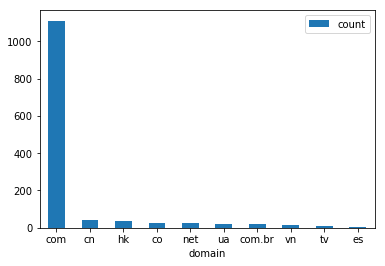

In [39]:
#Convert to list for plotting
domain=list(WebRTC_location_plot.keys())
count=list(WebRTC_location_plot.values())

dfplot = pd.DataFrame({'domain':domain[0:10],'count':count[0:10]})
                       
ax = dfplot.plot.bar(x='domain', y='count', rot=0)


In webRTC fingerprinting scripts out of 1376 locations 1110 are of .com com which is 80.66%.

## Conlusion

The dataset consists of the maximum of .com and .net TLDs for both script_url, location and hence audio, canvas fingerprinting show the same.  We can also observe that the .com TLDs are greater than 50% in both script_url and location. However, font fingerprinting shows the maximum of .net and in webrtcfingerprinting .cn and .ua have gretaer contribution as compared to .net.
If we consider the ccTLDs 'es', 'cn','de','ca','co.uk','it','co.jp','ua' are contributing towards fingerprinting.

The scripts are contributing to fingerprinting everytime they are called as a fairly precise heuristics is used to generate the lists and there is a slight possibility of missing some candidates than got too many false positives.


## Future  work

Looking at the TLD provides some insight regarding the associated website such as its objective (business, government, education), its owner, or the geographical area from which it originated.

In order to take the analysis further we can look at the frequency of the extracted fingerprinting scripts in the dataset. Further, we can start by analysing the scripts according to their frequency and try to analyse their behaviour.



Few questions which can be given a thought during the analysis.

- Is the script helping to establish a crossbrowser fingerprint? 
- Or a broader question, Are there any other privacy concerns while that script is executing, maybe in terms of the information it is targeting.








